# Prediction des défauts de paiement de cartes de crédit

Nous allons utiliser le jeu de données "Default of Credit Card Clients" disponible sur le site [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). Source: Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

Ce jeu de données contient des informations sur les défauts de paiement, les facteurs démographiques, les données de crédit, l'historique des paiements et les factures de cartes de crédit de 30 000 clients à Taiwan d'avril 2005 à septembre 2005.

Le jeu de données contient 25 variables :

- **ID** : ID client
- **LIMIT_BAL** : Limite max du crédit accordé en dollar NT
- **SEX** : Le genre du client (1 = homme, 2 = femme)
- **EDUCATION** : Niveau d'éducation (1 = cycle master/doctorat, 2 = université, 3 = lycée, 4 = autre)
- **MARRIAGE** : Etat matrimonial (1 = marié, 2 = célibataire, 3 = autre)
- **AGE** : Age
- **PAY_0** : Etat de remboursement en septembre 2005 (-1 = paiement effectué, 1 = paiement en retard de 2 mois, ..., 9 = paiement en retard de 9 mois et plus)
- **PAY_2** : Etat de remboursement en août 2005
- **PAY_3** : Etat de remboursement en juillet 2005
- **PAY_4** : Etat de remboursement en juin 2005
- **PAY_5** : Etat de remboursement en mai 2005
- **PAY_6** : Etat de remboursement en avril 2005
- **BILL_AMT1** : Montant de la facture en septembre 2005 (en dollar NT)
- **BILL_AMT2** : Montant de la facture en août 2005
- **BILL_AMT3** : Montant de la facture en juillet 2005
- **BILL_AMT4** : Montant de la facture en juin 2005
- **BILL_AMT5** : Montant de la facture en mai 2005
- **BILL_AMT6** : Montant de la facture en avril 2005
- **PAY_AMT1** : Montant du paiement précédent en septembre 2005 (en dollar NT)
- **PAY_AMT2** : Montant du paiement précédent en août 2005
- **PAY_AMT3** : Montant du paiement précédent en juillet 2005
- **PAY_AMT4** : Montant du paiement précédent en juin 2005
- **PAY_AMT5** : Montant du paiement précédent en mai 2005
- **PAY_AMT6** : Montant du paiement précédent en avril 2005
- **default.payment.next.month** : Défaut de paiement en octobre 2005 (1 = oui, 0 = non)

### Objectif
L'objectif de ce projet est de prédire si un client risque de passer en situation de défaut de paiement ou non. Je vais cependant, avant de commencer à travailler sur un modèle de prédiction, réaliser une analyse exploratoire des données afin de mieux comprendre le jeu de données et trouver les éléments qui vont être importants pour la prédiction.



## Analyse exploratoire des données

### Preprocessing
Le jeu de données est au format XLS, nous allons le convertir en CSV pour pouvoir l'utiliser. On va également supprimer la première ligne qui contient les noms des colonnes (X1,...,Y).

Je commence par installer xlrd pour pouvoir lire le fichier XLS:
<br>
<br>

In [707]:
import sys

import numpy as np
!{sys.executable} -m pip install xlrd


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: c:\users\audel\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [708]:
import pandas as pd

# on enlève la première ligne qui contient les noms des colonnes et la première colonne qui contient les ID :
df = pd.read_excel('default of credit card clients.xls', skiprows=[0], usecols="B:Y")
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
df.to_csv('default_credit_card_clients.csv', index=False)

<br>
On peut maintenant lire notre fichier CSV, voici les 5 premières lignes : <br>

In [709]:
df = pd.read_csv('default_credit_card_clients.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

<br>
On peut constater que le jeu de données a <b>30.000 lignes</b>, il a désormais <b>24 colonnes</b>, et il ne possède que des <b>valeurs numériques</b> (int).

Notre classe d'intérêt est <code>DEFAULT</code>, c'est la classe que l'on devra prédire. Comme énoncé plus haut, 1 signifie que le client est en situation de défaut de paiement, 0 signifie que le client a bien réglé ses factures. <br>
<br>
Vérifions maintenant que notre fichier ne possède pas de valeurs manquantes : <br>

In [711]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

On va maintenant explorer nos données pour voir ce qu'il s'y passe.
<br>
<br>
<h3> Exploration des données</h3>
On va commencer par regarder la répartition de notre classe d'intérêt <code>default</code> : <br>

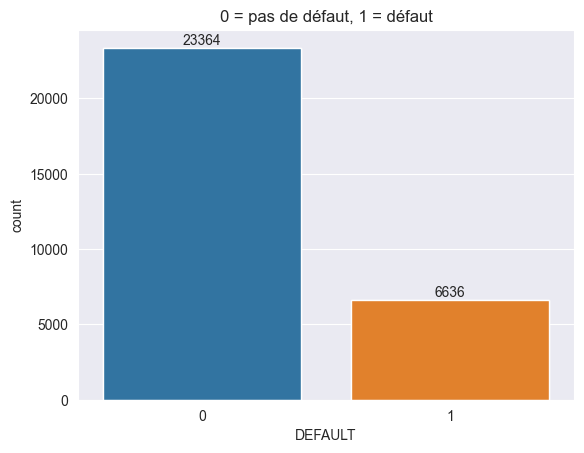

In [712]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='DEFAULT', data=df).bar_label(sns.countplot(x='DEFAULT', data=df).containers[0])
plt.title('0 = pas de défaut, 1 = défaut')
plt.show()

On constate que nos données sont déséquilibrées. Il y a beaucoup plus de clients qui ont réglé leurs factures (<b>23364</b>/<b>77.8%</b>) que de clients en situation de défaut de paiement (<b>6636</b>/<b>22.2%</b>).

Regardons la matrice de correlation :
<br>

Text(0.5, 1.0, 'Matrice de correlation')

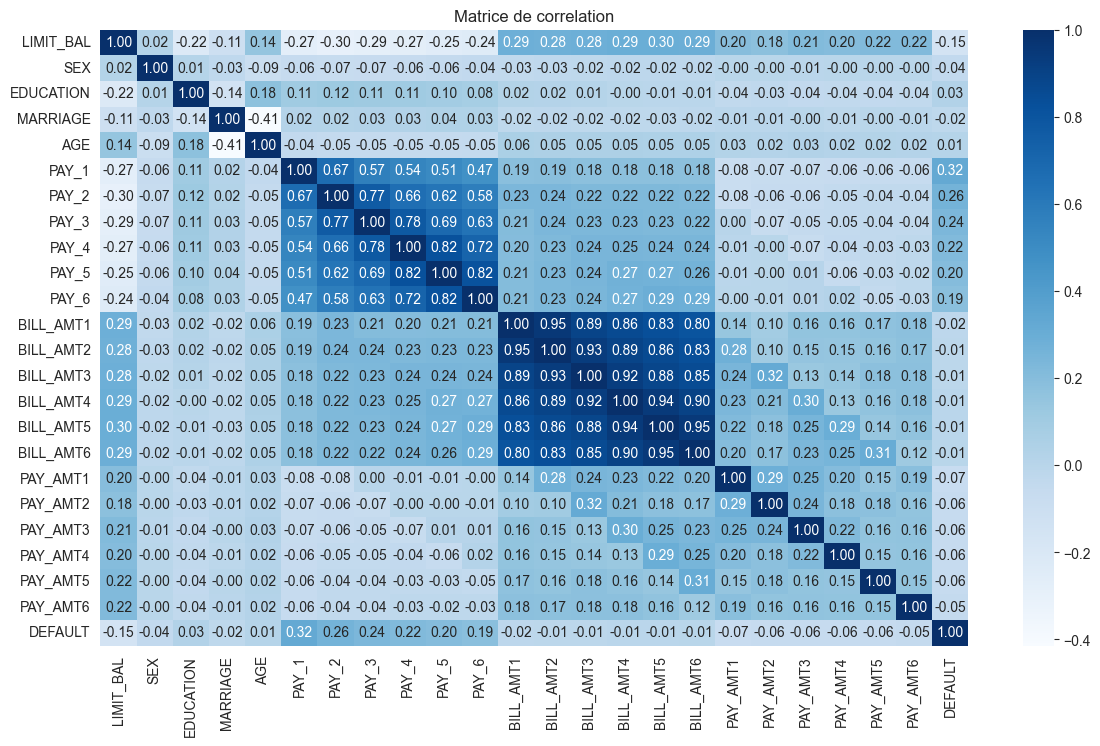

In [713]:
corr = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Matrice de correlation')

On constate plusieurs choses ici :
- les variables <code>PAY_1</code> à <code>PAY_6</code> ont les correlations positives les plus élevées avec <code>default</code>. La valeur la plus élevée est de <code>0.32</code> pour <code>PAY_1</code>.
- la variable <code>LIMIT_BAL</code> a une correlation de <code>0.15</code> avec <code>default</code>, c'est la corrélation négative la plus élevée.
- les variables <code>PAY_AMT1</code> à <code>PAY_AMT6</code> ont, elles aussi, des correlations négatives avec <code>default</code>.
- les variables <code>BILL_AMT*</code> et <code>PAY_AMT*</code> sont fortement corrélées entre elles au fil des mois, <code>BILL_AMT*</code> l'est encore plus que <code>PAY_AMT*</code>.

Cela signifie pour le premier élément que plus les paiements ont de retard, plus le risque de défaut de paiement est élevé, <code>PAY_1</code> est <b>la variable la plus prédictive</b> du défaut de paiement. Ensuite, plus le montant du crédit accordé est élevé et moins il y a de risque de défaut de paiement. Les montants des paiements précédents ont quant à eux peu d'incidence sur le défaut de paiement.
<br>
<h3>Hypothèses</h3>
L'expression "on ne prête qu'aux riches" semble s'appliquer ici, dans la vie réelle les montants élevés de crédit ne sont généralement accordés qu'aux personnes ayant le plus de garanties de le rembourser, en effet les banquiers effectuent de fortes vérifications lorsque la demande de crédit est élevée. Il n'en est pas de même pour les petits montants, on peut penser aux crédits à la consommation, ainsi les données que nous avons confirment qu'en effet, plus le crédit autorisé sur la carte est élevé, plus le risque de défaut de paiement est faible, les clients possédant ces crédits élevés sont plus à même de parvenir à les rembourser contrairement aux clients effectuant de petits crédits.

Concernant les variables relatives aux délais de remboursement, on a constaté que le premier retard de paiement était un très fort indicateur du défaut de paiement. Ce premier retard est ainsi un fort signal aux banquiers sur la possible insolvabilité du client, tous les retards suivants confirment que le risque de défaut du client est élevé. Les banquiers devraient ainsi particulièrement être attentifs à ces retards de paiement.

Enfin, concernant les variables <code>BILL_AMT*</code> et <code>PAY_AMT*</code>, il y a un lien logique entre les montants des factures et leur paiement d'un mois à l'autre.


Regardons plus en détail la répartition des clients en situation de défaut de paiement par rapport à leur limite de crédit.

<h3>Limite de crédit</h3>

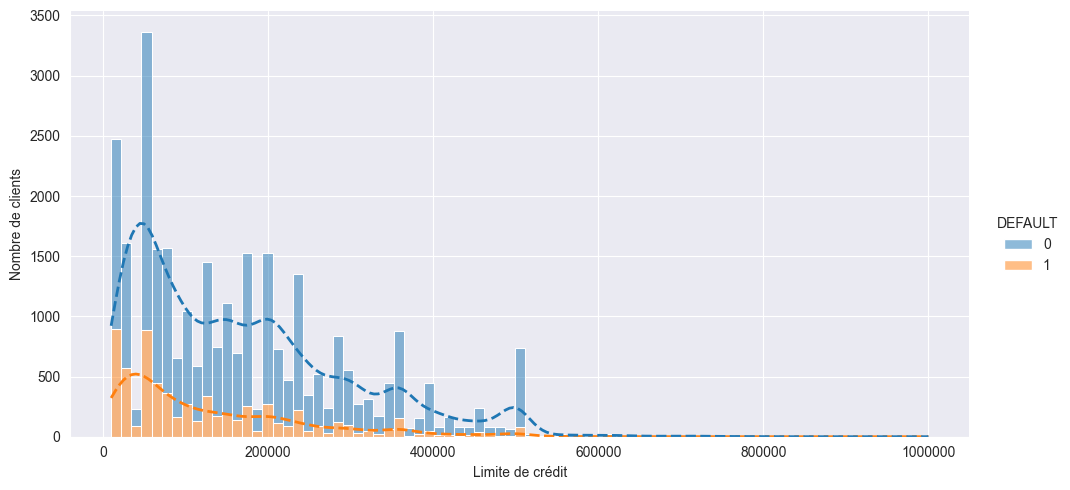

In [714]:
sns.displot(data=df, x="LIMIT_BAL", hue="DEFAULT", multiple="stack", stat='count', kde=True, line_kws={'ls':'--', 'lw':2}, height=5, aspect=2). \
    set_axis_labels("Limite de crédit", "Nombre de clients")
plt.ticklabel_format(style="plain")

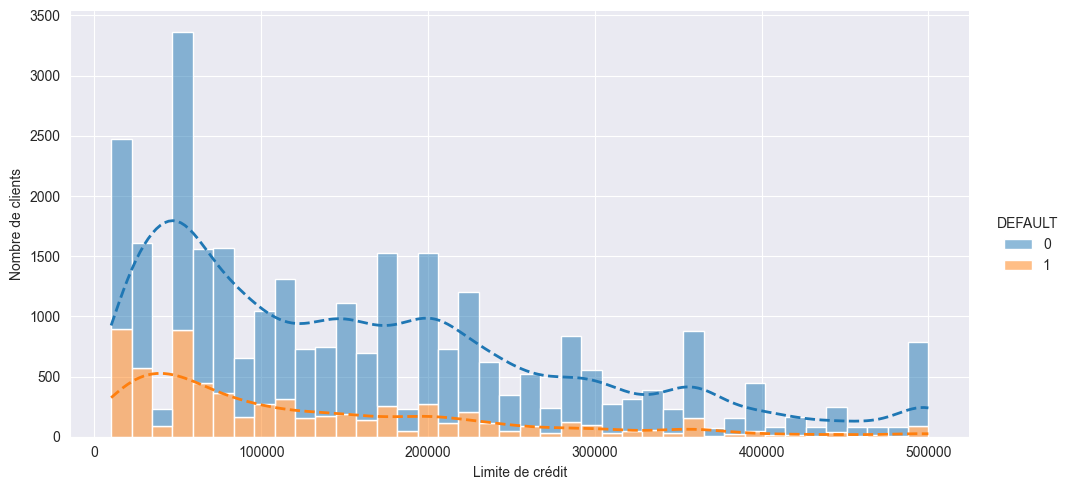

In [715]:
# regardons le même graphique sans les outliers (LIMIT_BAL > 500.000)
sns.displot(data=df[df['LIMIT_BAL'] <= 500000], x="LIMIT_BAL", hue="DEFAULT", multiple="stack", stat='count', kde=True, line_kws={'ls':'--', 'lw':2}, height=5, aspect=2). \
    set_axis_labels("Limite de crédit", "Nombre de clients")


In [716]:
df.groupby('DEFAULT')['LIMIT_BAL'].describe()

,count,mean,std,min,25%,50%,75%,max
DEFAULT,,,,,,,,
0,23364.0,178099.726074,131628.359660,10000.0,70000.0,150000.0,250000.0,1000000.0
1,6636.0,130109.656420,115378.540571,10000.0,50000.0,90000.0,200000.0,740000.0


In [717]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

<Axes: title={'center': 'Répartition des limites de crédit'}>

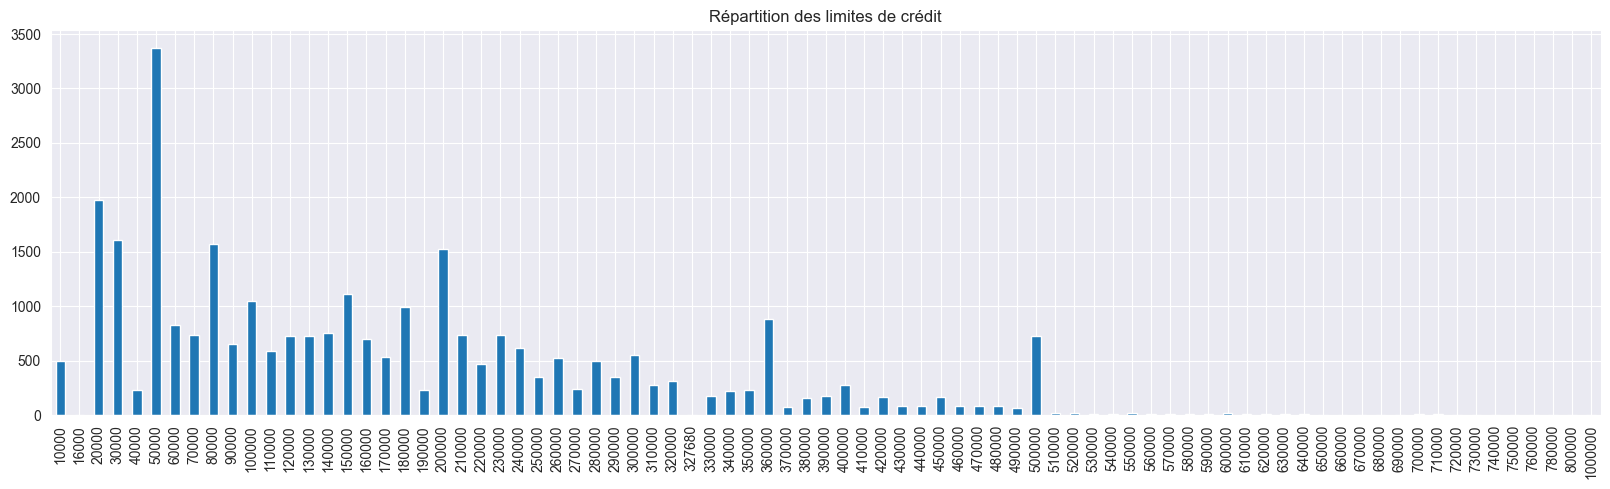

In [718]:
df['LIMIT_BAL'].value_counts(). \
    sort_index(). \
    plot(kind='bar', figsize=(20, 5), title='Répartition des limites de crédit')

<Axes: title={'center': 'Répartition des limites de crédit par défaut de paiement'}, xlabel='LIMIT_BAL'>

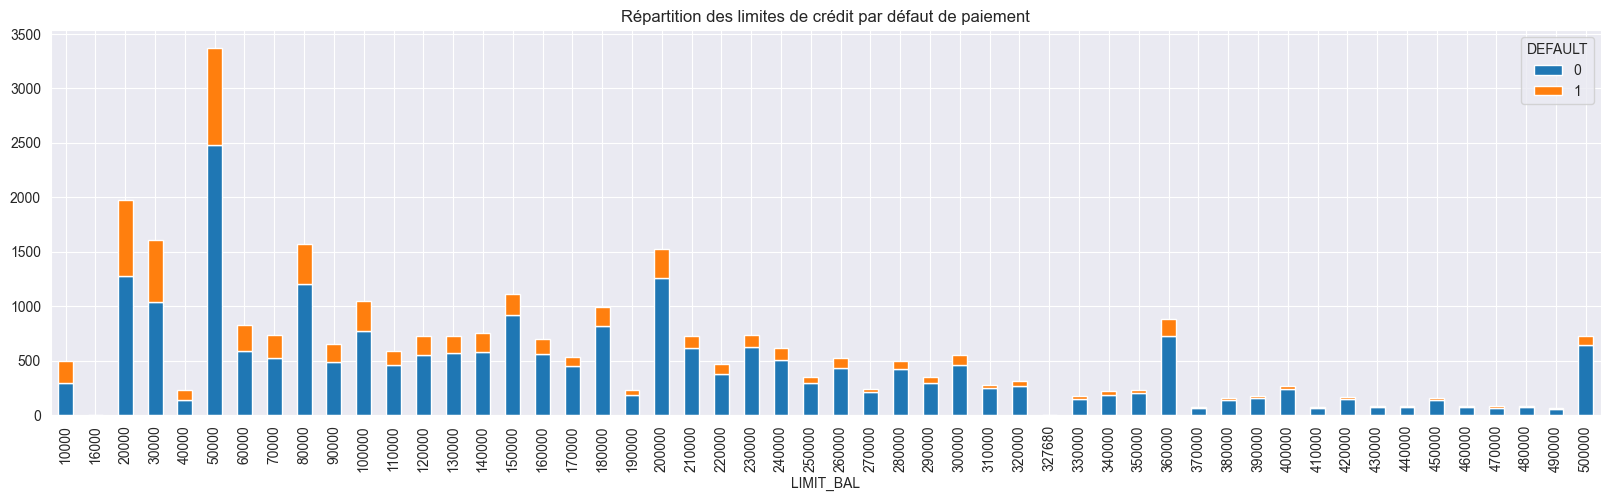

In [719]:
# amount of clients with default payment by LIMIT_BAL, up to 500.000
df[df['LIMIT_BAL'] <= 500000]. \
    groupby('LIMIT_BAL')['DEFAULT']. \
    value_counts(). \
    sort_index(). \
    unstack(). \
    plot(kind='bar', stacked=True, figsize=(20, 5), title='Répartition des limites de crédit par défaut de paiement')

On constate que le top 5 des limites de crédits les plus populaires sont, dans l'ordre, de :
- 50.000 (3365 clients)
- 20.000 (1976 clients)
- 30.000 (1610 clients)
- 80.000 (1567 clients)
- 200.000 (1528 clients)

Les défauts de paiement concernent les crédits allant de 10.000 à 740.000, avec une moyenne est de 130.109,65 et une déviation standard de 115.378,54.

Les crédits les plus élevés allant de 10.000 à 1.000.000 sont les moins touchés par les défauts de paiement, avec une moyenne de 178.099,72 et une déviation standard de 131.628,35.

Par ailleurs, la plupart des défauts de paiement concernent les crédits de <b>50.000</b>, <b>20.000</b> et <b>30.000</b>. Ces éléments confirment notre hypothèse.

<br>

<h3>Analyse du profil des clients</h3>
Etudions les données des clients pour mieux comprendre les facteurs susceptibles d'indiquer un défaut de paiement à venir.

Commençons par l'élément ayant la corrélation positive la plus élevée : <code>PAY_1</code>

<h4>Etat de remboursement</h4>
Voici le taux de défaut de paiement au sein de <code>PAY_1</code> :

In [720]:
pay_mean = df.groupby('PAY_1').agg({'DEFAULT':'mean'})
print(pay_mean * 100)

         DEFAULT
PAY_1           
-2     13.229431
-1     16.778051
 0     12.811291
 1     33.947939
 2     69.141357
 3     75.776398
 4     68.421053
 5     50.000000
 6     54.545455
 7     77.777778
 8     57.894737


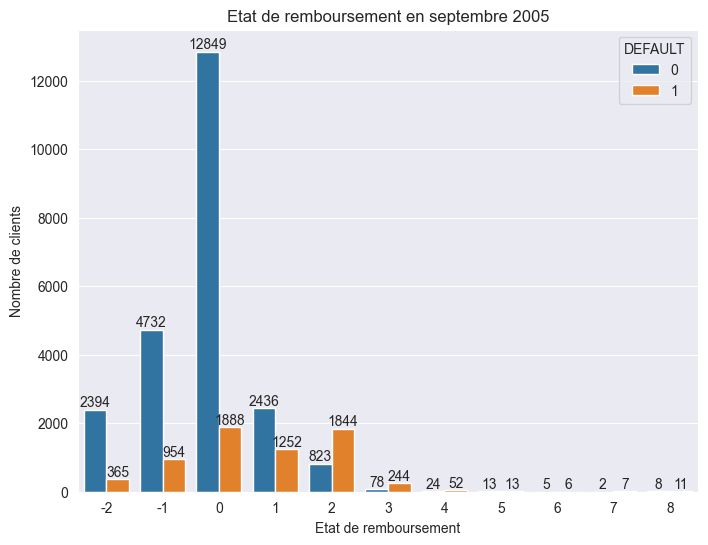

In [721]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='PAY_1', hue='DEFAULT')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Etat de remboursement en septembre 2005')
plt.xlabel('Etat de remboursement')
plt.ylabel('Nombre de clients')
plt.show()

On remarque des valeurs qui n'ont pas été documentées dans le dataset original : <b>-2</b> et <b>0</b>.

Il semblerait que -2 signifie qu'il n'y a pas de crédit à rembourser et que 0 signifie qu'un paiement a été fait, mais pas en intégralité.

Nous constatons ainsi une fois encore que le retard de paiement est effectivement un marqueur très important de l'état de défaut de paiement à venir, 69% des clients qui ont eu 2 mois de retard sont en situation de défaut.

Concernant PAY_2 à PAY_6 :

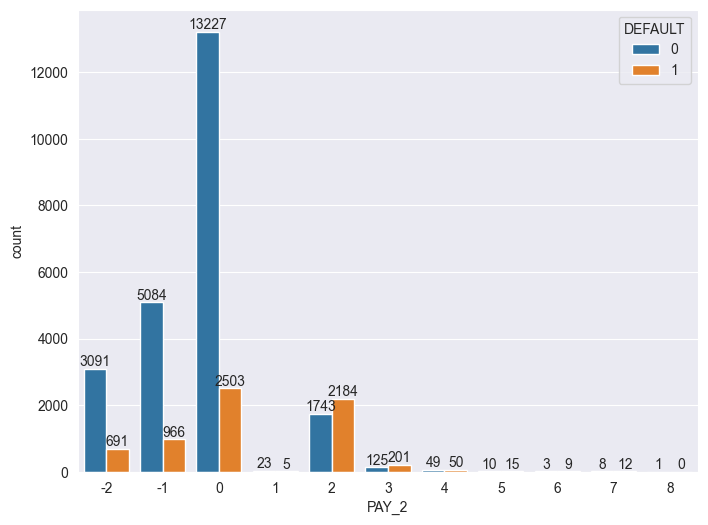

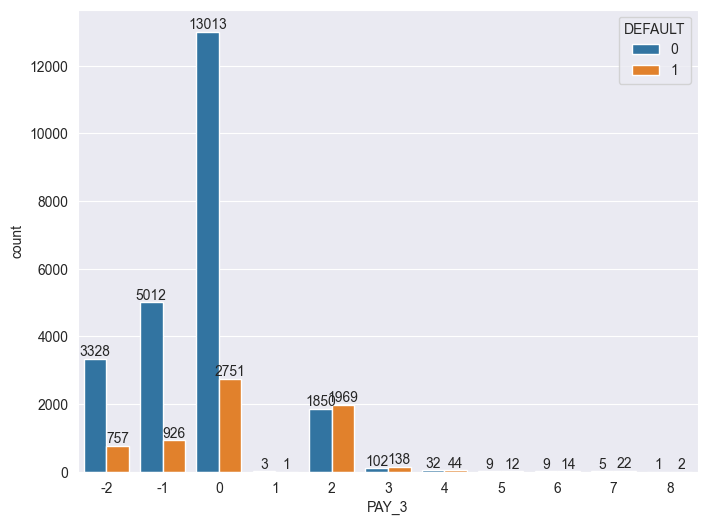

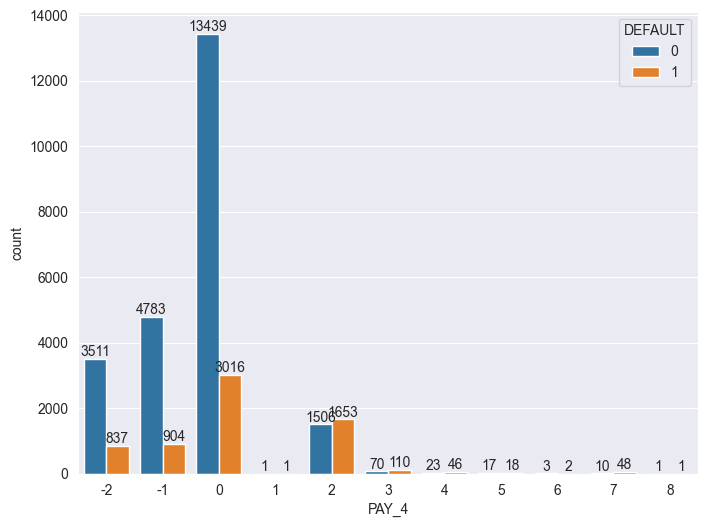

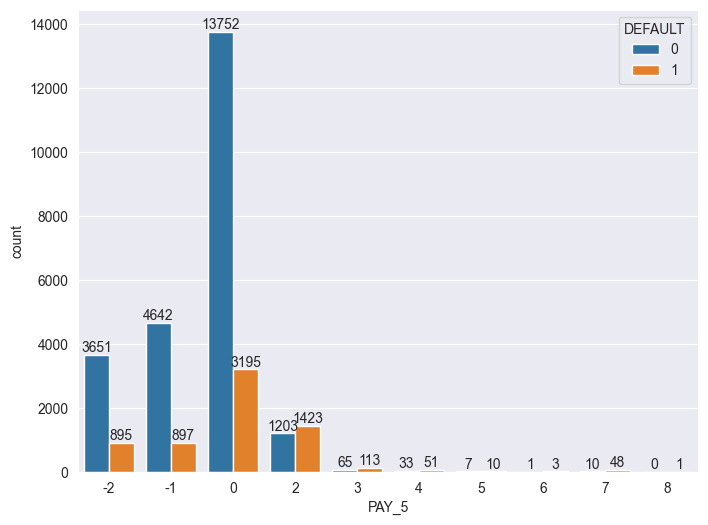

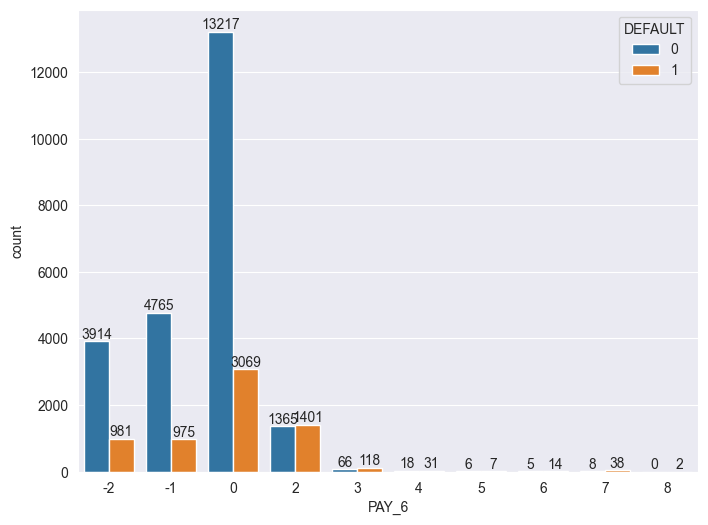

In [722]:
for i in ['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=i, data=df, hue='DEFAULT')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

On remarque que le mois de septembre (PAY_1) est différent des autres, il faut regarder la valeur <b>1</b> : tous les autres mois rapportent extrêmement peu ou aucune valeur 1, septembre est le seul mois où cette valeur est élevée. Pour rappel, 1 correspond à un retard de paiement de 1 mois. Nous ne savons malheureusement pas pourquoi ce retard de 1 mois n'est pas ou quasi pas relevé de PAY_2 à PAY_6.

Regardons maintenant l'éducation des clients :

<h4>Niveau d'éducation</h4>

In [723]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

On constate ici aussi que les valeurs 0, 5 et 6 ne sont pas documentées dans le dataset original. On va donc placer les valeurs non documentées dans la catégorie 4, qui est "autre" (others) :

In [724]:
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Tout est bon désormais, pour rappel :
- 1 = master/doctorat (graduate school)
- 2 = études universitaires (university)
- 3 = lycée (high school)
- 4 = autres (others)

On va maintenant regarder la répartition des clients selon leur niveau d'éducation :

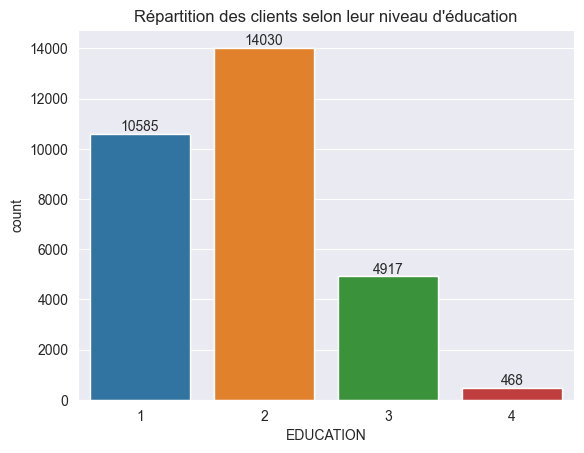

In [725]:
sns.countplot(x='EDUCATION', data=df).bar_label(sns.countplot(x='EDUCATION', data=df).containers[0])
plt.title('Répartition des clients selon leur niveau d\'éducation')
plt.show()

On constate que la majorité des clients ont un niveau d'éducation de 2 (études universitaires), suivi par 1 (master/doctorat) et 3 (lycée). Les clients ayant un niveau d'éducation de 4 (autres) sont très peu nombreux.

Regardons maintenant la répartition de ces clients selon leur situation de défaut de paiement :

<Axes: xlabel='EDUCATION'>

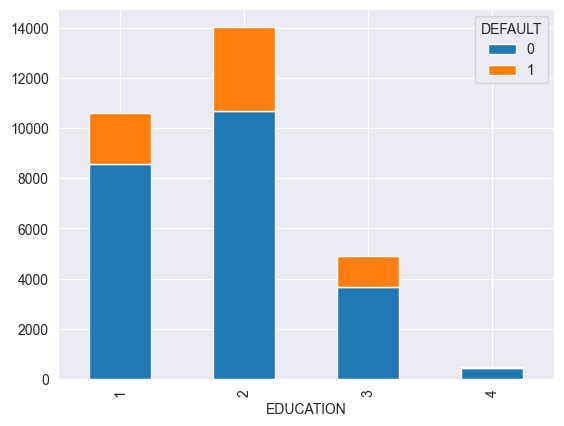

In [726]:
pd.crosstab(df['EDUCATION'], df['DEFAULT']).plot.bar(stacked=True)

In [727]:
# On va maintenant calculer le taux de défaut de paiement pour chaque niveau d'éducation
education_mean = df.groupby('EDUCATION').agg({'DEFAULT':'mean'})
print(education_mean * 100)

             DEFAULT
EDUCATION           
1          19.234766
2          23.734854
3          25.157616
4           7.051282


On constate que les clients ayant un niveau d'éducation de 1 (master/doctorat) ont le taux de défaut de paiement le moins élevé (à part pour la catégorie "Other").

Les clients ayant un niveau d'éducation de 3 (lycée) ont le taux de défaut de paiement le plus élevé, suivi par les clients ayant un niveau d'éducation de 2 (études universitaires).

Regardons maintenant les données concernant le genre, pour rappel 1 = homme, 2 = femme :

<h4>Genre</h4>

In [728]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [729]:
men, women = round((df['SEX'] == 1).mean() * 100, 2), \
    round((df['SEX'] == 2).mean() * 100, 2)
print(f"Il y a {men}% d'hommes et {women}% de femmes dans le dataset.")

Il y a 39.63% d'hommes et 60.37% de femmes dans le dataset.


<Axes: xlabel='SEX'>

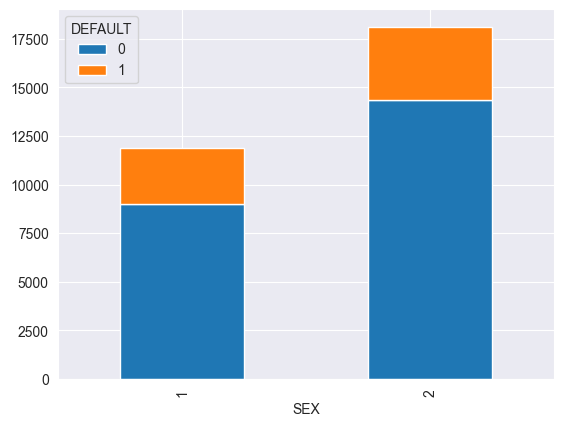

In [730]:
pd.crosstab(df['SEX'], df['DEFAULT']).plot.bar(stacked=True)

In [731]:
gender_mean = df.groupby('SEX').agg({'DEFAULT':'mean'})
print(gender_mean * 100)

       DEFAULT
SEX           
1    24.167227
2    20.776281


Il y a un pourcentage plus élevé de femmes (60.4%) que d'hommes (39.6%) dans le dataset. On constate par ailleurs que les hommes ont un taux de défaut de paiement plus élevé que les femmes : 24.2% des hommes sont en situation de défaut de paiement contre 20.8% des femmes.

Regardons maintenant les données concernant l'âge :

<h4>Âge</h4>

In [732]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

On constate que l'âge minimum est de 21 ans et l'âgee maximum est de 79 ans. L'âge moyen est quant à lui de 35 ans.

Regardons maintenant la répartition  des clients en situation de défaut de paiement par rapport à leur âge :

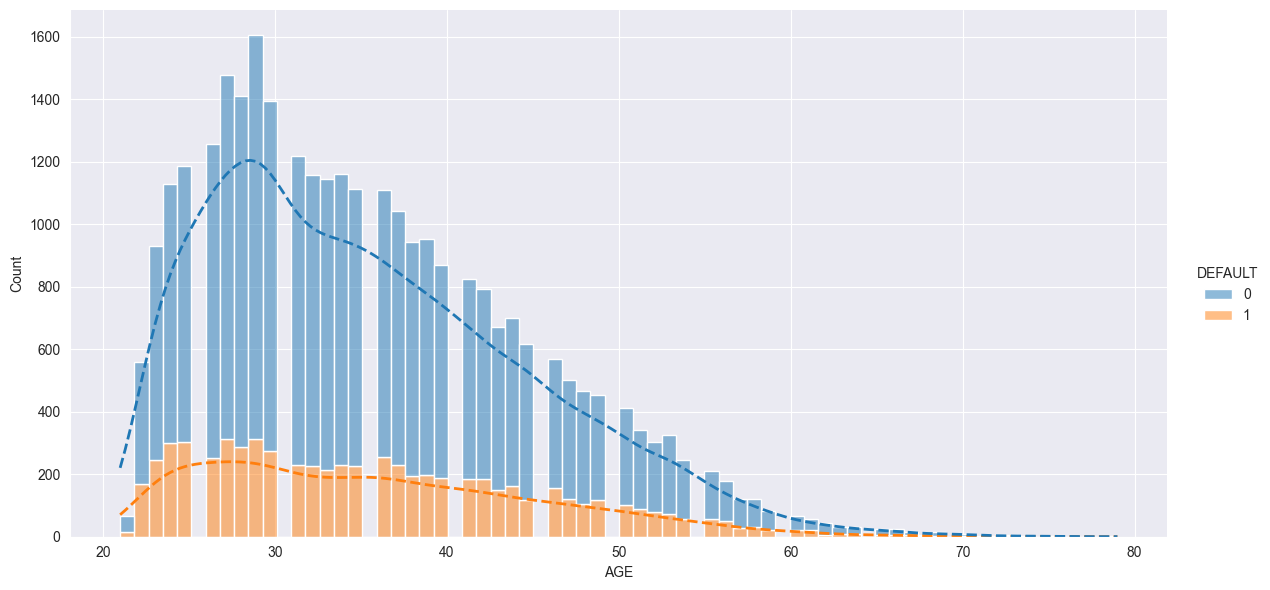

In [733]:
sns.displot(data=df, x="AGE", hue="DEFAULT", multiple="stack", stat='count', kde=True, line_kws={'ls':'--', 'lw':2}, height=6, aspect=2)

In [734]:
age_mean = df.groupby('AGE').agg({'DEFAULT':'mean'}).sort_values(ascending=False, by='DEFAULT')
print(age_mean * 100)

       DEFAULT
AGE           
73   75.000000
61   37.500000
60   34.328358
75   33.333333
72   33.333333
67   31.250000
22   30.178571
64   29.032258
66   28.000000
46   27.543860
56   27.528090
55   27.272727
24   26.619343
23   26.530612
49   26.327434
51   25.882353
63   25.806452
52   25.657895
25   25.463744
58   25.409836
59   25.301205
50   24.574209
47   23.952096
42   23.299748
44   23.142857
36   22.924188
53   22.769231
54   22.672065
41   22.451456
43   22.388060
48   22.317597
57   22.131148
37   21.998079
40   21.494253
27   21.191605
21   20.895522
39   20.859539
65   20.833333
38   20.550847
35   20.305481
28   20.298084
26   20.143312
68   20.000000
69   20.000000
70   20.000000
34   19.879518
30   19.641577
29   19.501558
32   19.430052
31   18.816763
45   18.800648
33   18.760908
62   15.909091
71    0.000000
74    0.000000
79    0.000000


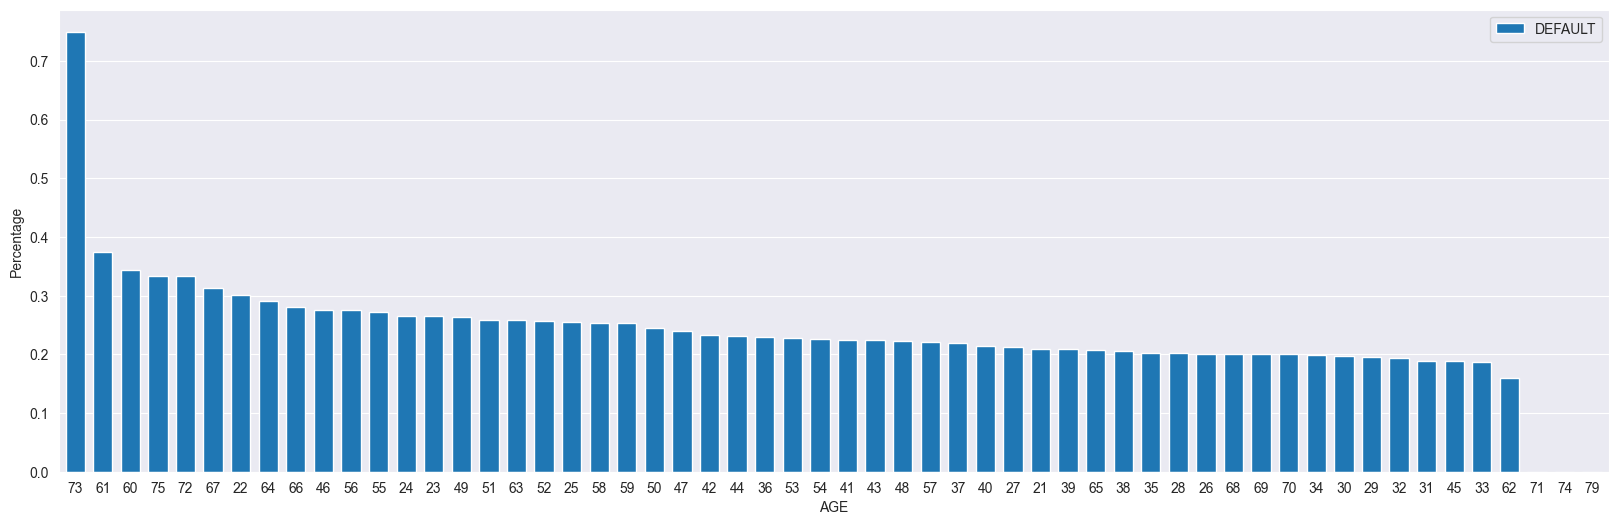

In [735]:
age_mean.plot.bar(figsize=(20,6), width=0.7)
plt.ylabel("Percentage")
plt.grid(axis='x')
plt.xticks(rotation=0)
plt.show()

In [736]:
# Limite de crédit moyenne et taux de défaut de paiement par tranche d'âge
age_mean = df.groupby(pd.cut(df['AGE'], bins=[21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 79])).agg({'DEFAULT':'mean', 'LIMIT_BAL':'mean'}).sort_values(ascending=False, by='DEFAULT')
print(age_mean)

           DEFAULT      LIMIT_BAL
AGE                              
(70, 79]  0.333333  226000.000000
(60, 65]  0.268817  190322.580645
(21, 25]  0.267613   74652.996845
(55, 60]  0.263986  150821.678322
(65, 70]  0.253521  226056.338028
(45, 50]  0.250417  172955.000000
(50, 55]  0.247719  162771.929825
(40, 45]  0.221359  184157.470180
(35, 40]  0.216189  196780.557250
(25, 30]  0.201484  164320.918510
(30, 35]  0.194272  197688.060732


On constate des éléments intéressants, tout d'abord les clients les plus âgés ont une limite de crédit moyenne plus élevée que les clients plus jeunes, cela paraît logique vu que les clients plus âgés ont généralement plus de revenus. Cependant, malgré une limite de crédit élevée, les clients de la tranche d'âge 50-79 ont un taux de défaut de paiement élevé, et la tranche d'âge de 25-35 ans ont les taux de défaut de paiement les plus faibles :

In [737]:
# Nombre de clients en défaut de paiement par tranche d'âge et leur pourcentage par rapport au total :
df.groupby(pd.cut(df['AGE'], bins=[21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 79])).agg({'DEFAULT':'count'}).assign(percentage=lambda x: x / x.sum() * 100)

,DEFAULT,percentage
AGE,,
"(21, 25]",3804,12.708382
"(25, 30]",7142,23.859954
"(30, 35]",5796,19.363245
"(35, 40]",4917,16.426686
"(40, 45]",3605,12.043564
"(45, 50]",2400,8.017907
"(50, 55]",1425,4.760632
"(55, 60]",572,1.910934
"(60, 65]",186,0.621388


Ainsi, les tranches d'âge ayant les taux de défaut de paiement les plus élevés sont les plus jeunes et les plus âgées :
- 21-25 ans
- 50-79 ans

Regardons maintenant les données concernant le statut marital :

In [738]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Nous remarquons ici encore que la valeur 0 n'est pas documentée dans le dataset original. Nous allons donc placer cette valeur dans la catégorie 3, qui est "autre" (others) :

In [739]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Regardons maintenant la relation entre le statut marital et le taux de défaut de paiement :

<Axes: xlabel='MARRIAGE'>

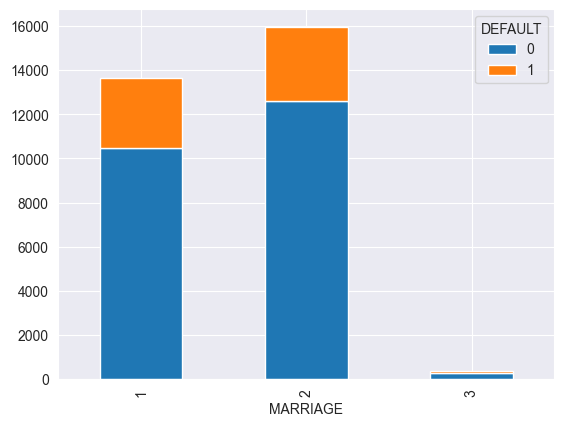

In [740]:
pd.crosstab(df['MARRIAGE'], df['DEFAULT']).plot.bar(stacked=True)

In [741]:
marriage_mean = df.groupby('MARRIAGE').agg({'DEFAULT':'mean'})
print(marriage_mean * 100)

            DEFAULT
MARRIAGE           
1         23.471704
2         20.928339
3         23.607427


Pour rappel : 1 = marié, 2 = célibataire, 3 = autre (others).
Nous constatons qu'il y a plus de clients célibataires que mariés, de plus les clients mariés ont un taux de défaut de paiement plus élevé que les clients célibataires.


<h3>Le profil à risque</h3>

Le profil du client à risque, c'est-à-dire le client ayant un risque de défaut de paiement plus élevé, serait donc un client :

- homme
- jeune
- marié
- ayant arrêté ses études après le lycée
- ayant une limite de crédit basse
- ayant eu un retard de paiement

Ce profil ne reste qu'une indication qui ressort de ce jeu de données, on rappelle qu'il ne concerne que 30.000 clients dont 22.2% en défaut de paiement.

Maintenant que nous avons analysé ce jeu de données, nous allons nous intéresser à la prédiction du défaut de paiement.

<h1>Prédiction du défaut de paiement</h1>

Pour pouvoir prédire le défaut de paiement à partir de ce jeu de données, nous allons devoir l'arranger à nouveau afin d'enlever la classe à prédire, la cible, soit la classe <code>DEFAULT</code>. Nous allons en outre couper le jeu de données pour l'entraînement et les tests.

Le classement qui sera effectué sera un classement binaire : 0 = pas de défaut de paiement, 1 = défaut de paiement.

<h2>Préparation des données</h2>
<h3>Découpe des données</h3>

In [742]:
# on enlève les variables cibles de nos données
X = df.drop(['DEFAULT'], axis=1)

# on place les variables cibles ici
y = df['DEFAULT']

# on va maintenant séparer/split nos données pour l'entraînement du modèle et les tests, 20% des données seront utilisées pour les tests, 80% pour l'entraînement :
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

<h3>Normalisation des données</h3>

In [743]:
# pour normaliser les données, on va tout d'abord convertir les données en numpy array :
#X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# on peut maintenant utiliser la fonction MinMaxScaler de sklearn pour normaliser les données :
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2>Création du modèle</h2>

Nous allons utiliser Keras pour créer un modèle séquentiel, c'est-à-dire un modèle qui va être composé de plusieurs couches de neurones et qui va être utilisé pour réaliser une classification binaire.

In [863]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization.batch_normalization import BatchNormalization

model = Sequential()
model.add(Dense(80, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [864]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 80)                1920      
                                                                 
 dropout_107 (Dropout)       (None, 80)                0         
                                                                 
 dense_175 (Dense)           (None, 80)                6480      
                                                                 
 dropout_108 (Dropout)       (None, 80)                0         
                                                                 
 dense_176 (Dense)           (None, 40)                3240      
                                                                 
 dense_177 (Dense)           (None, 1)                 41        
                                                                 
Total params: 11,681
Trainable params: 11,681
Non-tra

In [865]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [866]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
750/750 [==============================] - 4s 4ms/step - loss: 0.4761 - accuracy: 0.8047 - val_loss: 0.4404 - val_accuracy: 0.8238
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4495 - accuracy: 0.8136 - val_loss: 0.4272 - val_accuracy: 0.8260
Epoch 3/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4460 - accuracy: 0.8146 - val_loss: 0.4253 - val_accuracy: 0.8240
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.8152 - val_loss: 0.4279 - val_accuracy: 0.8245
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4389 - accuracy: 0.8161 - val_loss: 0.4257 - val_accuracy: 0.8250
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4375 - accuracy: 0.8161 - val_loss: 0.4219 - val_accuracy: 0.8247
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4354 - accuracy: 0.8185 - val_loss: 0.4221 - val_accuracy: 0.8248

Regardons la précision du modèle sur les données d'entraînement et de test :

In [867]:
# on récupère les données de précision du modèle :
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# on récupère les données de perte du modèle :
train_loss = history.history['loss']
test_loss = history.history['val_loss']

<h3>Précision du modèle</h3>

In [868]:
print("\nModel evaluation:")
print('----------------------------')
print('Test loss: %.2f%%\nTest accuracy: %.2f%%' % (test_loss[-1]*100, test_acc[-1]*100))


Model evaluation:
----------------------------
Test loss: 43.21%
Test accuracy: 82.08%


<h3>Matrice de confusion et rapport de classification</h3>

In [869]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix & classification report:
print("\nConfusion matrix:")
print('----------------------------')
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('\nClassification report:')
print('----------------------------')
print(classification_report(y_test, y_pred))


Confusion matrix:
----------------------------
188/188 [==============================] - 0s 1ms/step
[[4471  228]
 [ 847  454]]

Classification report:
----------------------------
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4699
           1       0.67      0.35      0.46      1301

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



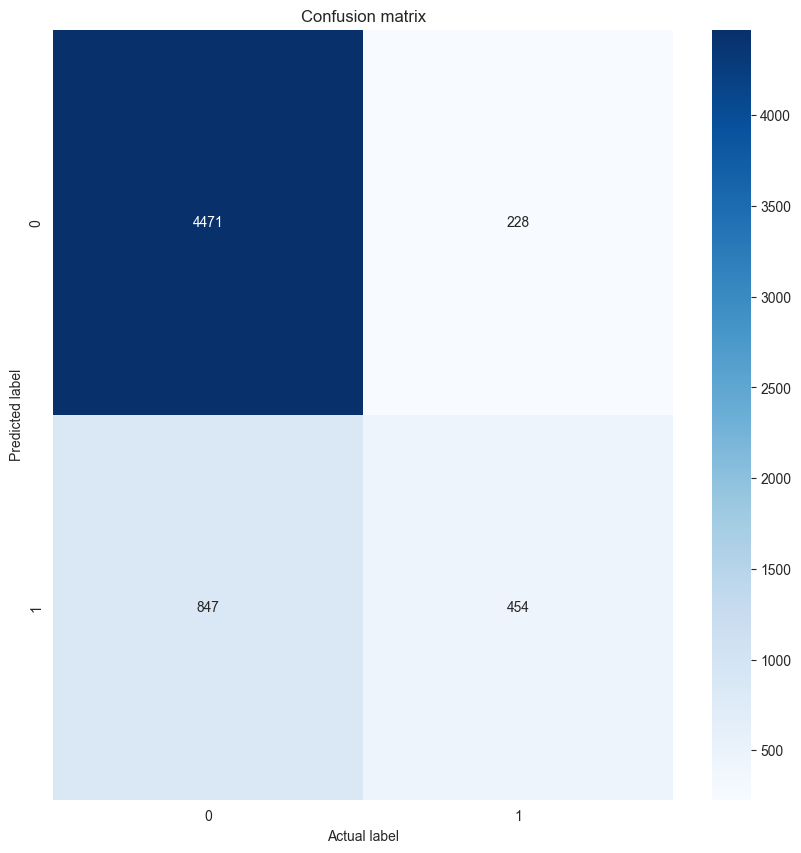

In [870]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

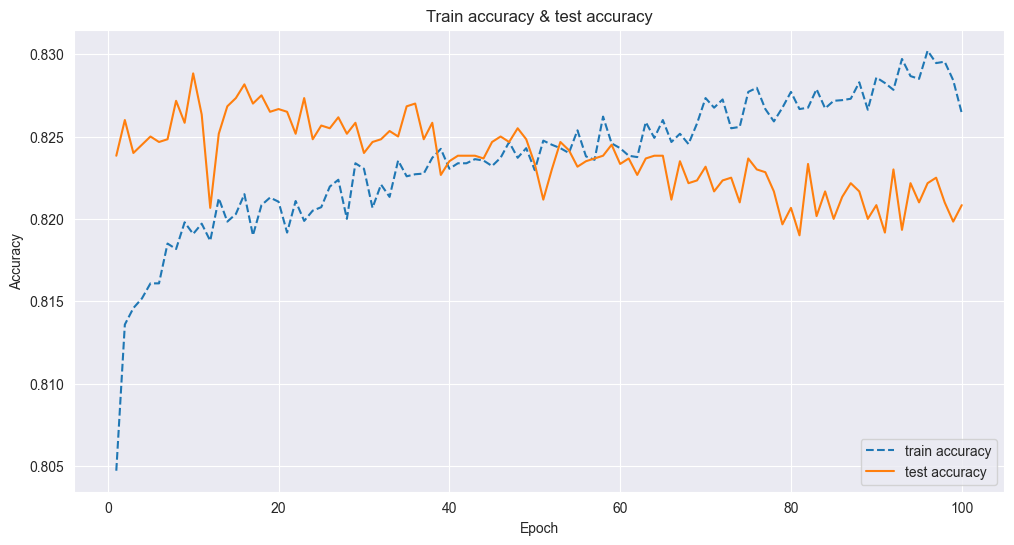

In [871]:
# on affiche les données de précision du modèle :
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_acc)+1), train_acc, '--', label='train accuracy')
plt.plot(range(1, len(train_acc)+1), test_acc, label='test accuracy')
plt.title('Train accuracy & test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

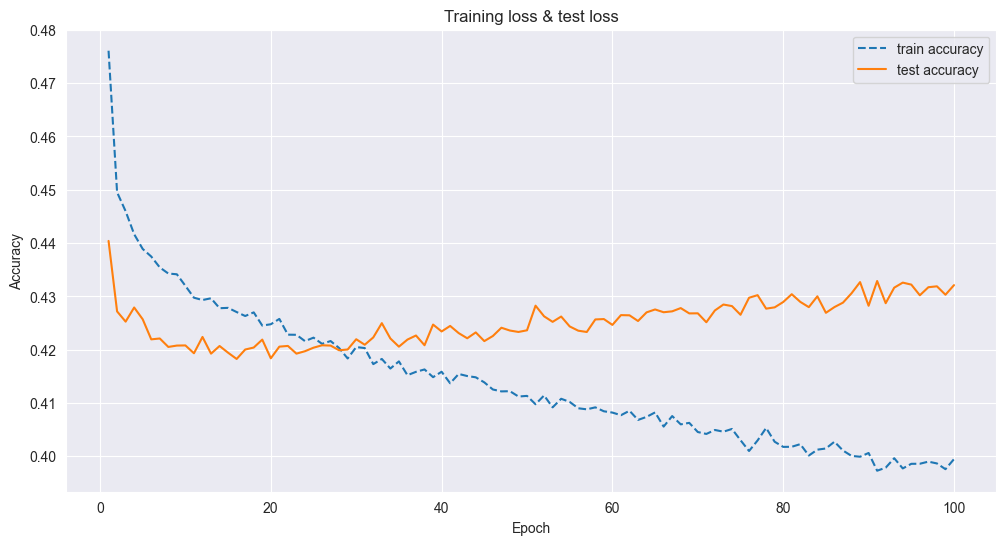

In [872]:
# on affiche les données de perte du modèle :

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_loss)+1), train_loss, '--', label='train accuracy')
plt.plot(range(1, len(train_loss)+1), test_loss, label='test accuracy')
plt.title('Training loss & test loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Rappelons que les données sont déséquilibrées : 22.2% de clients ont un défaut de paiement (DEFAULT=1) contre 77.8% de clients qui sont en règle (DEFAULT=0).

Le modèle ne va pas réussir à correctement prédire les clients qui seront en défaut de paiement, le score F1 et de recall sont ainsi trop faibles : 46% et 36%.

Nous allons essayer de résoudre ce problème en utilisant la technique de suréchantillonnage (oversampling) pour équilibrer les données. Nous allons utiliser l'algorithme SMOTE (Synthetic Minority Oversampling Technique) pour créer des données artificielles pour les clients en défaut de paiement.

<h2>Suréchantillonnage des données</h2>

In [873]:
from imblearn.over_sampling import SMOTE

# 0.5 = 78% accuracy, 0.3 = 80% accuracy, 0.7 = 76% accuracy
sm = SMOTE(random_state=75, sampling_strategy=0.8)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

Nos données sont désormais artificiellement équilibrées :

In [874]:
print("Avant suréchantillonnage :")
print(f"DEFAULT 0 : {len(y_train[y_train == 0])}\nDEFAULT 1 : {len(y_train[y_train == 1])}")

print("\nAprès suréchantillonnage :")
print(f"DEFAULT 0 : {len(y_train_sm[y_train_sm == 0])}\nDEFAULT 1 : {len(y_train_sm[y_train_sm == 1])}")

Avant suréchantillonnage :
DEFAULT 0 : 18665
DEFAULT 1 : 5335

Après suréchantillonnage :
DEFAULT 0 : 18665
DEFAULT 1 : 14932


<h2>Création du modèle avec suréchantillonnage</h2>

In [878]:
model_sm = Sequential()
# model_sm.add(Dense(128, input_dim=X_train_sm.shape[1], activation='relu'))
# model_sm.add(Dense(64, activation='relu'))
# model_sm.add(Dropout(0.2))
# model_sm.add(BatchNormalization())
# model_sm.add(Dense(32, activation='relu'))
# model_sm.add(Dropout(0.2))
# model_sm.add(BatchNormalization())
# model_sm.add(Dense(32, activation='relu'))
# model_sm.add(Dropout(0.2))
# model_sm.add(BatchNormalization())
# model_sm.add(Dense(16, activation='relu'))
# model_sm.add(Dropout(0.2))
# model_sm.add(BatchNormalization())
# model_sm.add(Dense(1, activation='sigmoid'))
model_sm.add(Dense(80, input_dim=X_train.shape[1], activation='relu'))
model_sm.add(Dropout(0.2))
model_sm.add(Dense(80, activation='relu'))
model_sm.add(Dropout(0.2))
model_sm.add(Dense(40, activation='relu'))
model_sm.add(Dense(1, activation='sigmoid'))

In [879]:
model_sm.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 80)                1920      
                                                                 
 dropout_109 (Dropout)       (None, 80)                0         
                                                                 
 dense_179 (Dense)           (None, 80)                6480      
                                                                 
 dropout_110 (Dropout)       (None, 80)                0         
                                                                 
 dense_180 (Dense)           (None, 40)                3240      
                                                                 
 dense_181 (Dense)           (None, 1)                 41        
                                                                 
Total params: 11,681
Trainable params: 11,681
Non-tra

In [880]:
model_sm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [881]:
history_sm = model_sm.fit(X_train_sm, y_train_sm, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1050/1050 [==============================] - 4s 2ms/step - loss: 0.5889 - accuracy: 0.7022 - val_loss: 0.5340 - val_accuracy: 0.7958
Epoch 2/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5667 - accuracy: 0.7168 - val_loss: 0.5358 - val_accuracy: 0.7647
Epoch 3/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5607 - accuracy: 0.7174 - val_loss: 0.5033 - val_accuracy: 0.8003
Epoch 4/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7222 - val_loss: 0.5225 - val_accuracy: 0.7808
Epoch 5/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5520 - accuracy: 0.7233 - val_loss: 0.5481 - val_accuracy: 0.7677
Epoch 6/100
1050/1050 [==============================] - 3s 2ms/step - loss: 0.5489 - accuracy: 0.7238 - val_loss: 0.4935 - val_accuracy: 0.7975
Epoch 7/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7247 - val_loss: 0.4987 - val_ac

In [882]:
# on récupère les données de précision du modèle :
train_acc_sm = history_sm.history['accuracy']
test_acc_sm = history_sm.history['val_accuracy']

# on récupère les données de perte du modèle :
train_loss_sm = history_sm.history['loss']
test_loss_sm = history_sm.history['val_loss']

In [883]:
print("\nModel evaluation:")
print('----------------------------')
print('Test loss: %.2f%%\nTest accuracy: %.2f%%' % (test_loss_sm[-1]*100, test_acc_sm[-1]*100))


Model evaluation:
----------------------------
Test loss: 51.73%
Test accuracy: 76.25%


In [884]:
# Confusion matrix & classification report:
print("\nConfusion matrix:")
print('----------------------------')
y_pred_sm = (model_sm.predict(X_test) > 0.5).astype("int32")
cm_sm = confusion_matrix(y_test, y_pred_sm)
print(cm_sm)

print('\nClassification report:')
print('----------------------------')
print(classification_report(y_test, y_pred_sm))


Confusion matrix:
----------------------------
188/188 [==============================] - 0s 1ms/step
[[3794  905]
 [ 520  781]]

Classification report:
----------------------------
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4699
           1       0.46      0.60      0.52      1301

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.76      0.77      6000



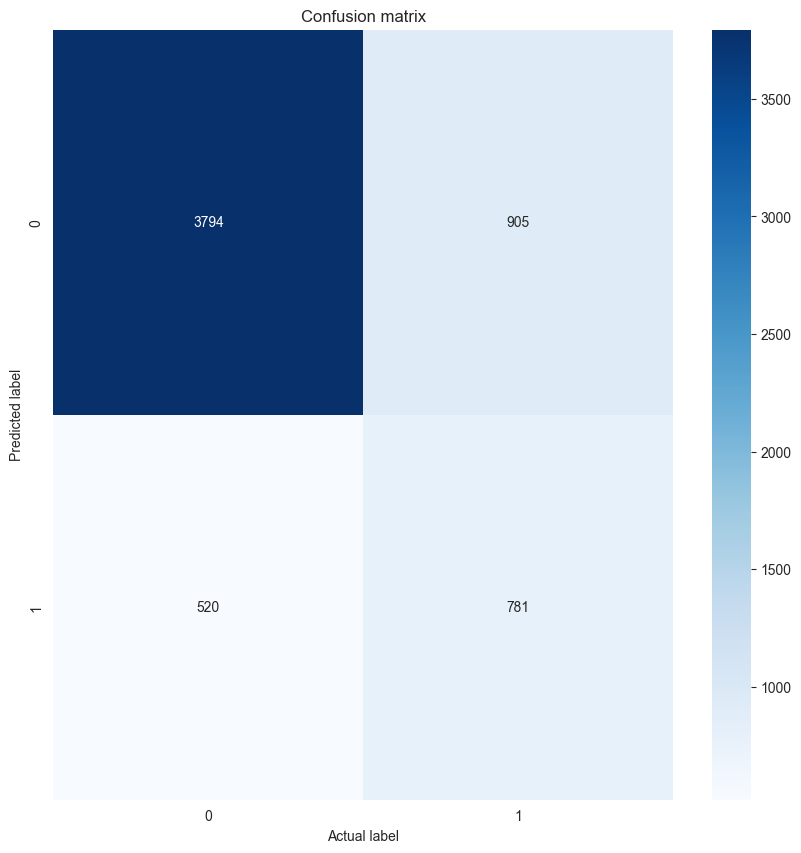

In [885]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm_sm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

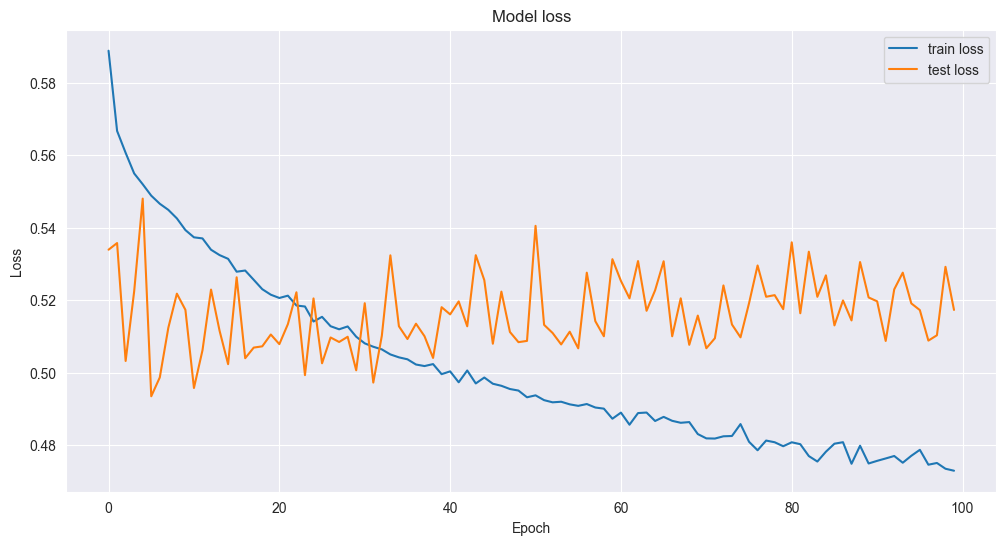

In [886]:
# plotting the training and validation loss:

plt.figure(figsize=(12, 6))
plt.plot(train_loss_sm, label='train loss')
plt.plot(test_loss_sm, label='test loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Bien que nous ayons amélioré le score de recall du modèle avec SMOTE, nous avons perdu en précision.

Le recall mesure la proportion de clients en défaut de paiement que le modèle a correctement identifié parmi tous les clients en défaut de paiement du jeu de données. Un score de recall bas signifie plus de faux négatifs.

La précision mesure quant à elle la proportion de clients en défaut de paiement que le modèle a correctement identifié parmi tous les clients identifiés comme étant en défaut de paiement. Avec une précision moins élevée, nous avons plus de faux positifs.

Etudions maintenant d'autres algorithmes de machine learning.

<h2>Random Forest</h2>

In [793]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=140, max_depth=6, random_state=75)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

score = accuracy_score(y_test, y_pred_rf)

print("\nModel evaluation:")
print('----------------------------')
print(f'Accuracy on test: %.2f%%' % (score * 100))

print(classification_report(y_test, y_pred_rf))


Model evaluation:
----------------------------
Accuracy on test: 82.90%
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4699
           1       0.71      0.36      0.47      1301

    accuracy                           0.83      6000
   macro avg       0.78      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



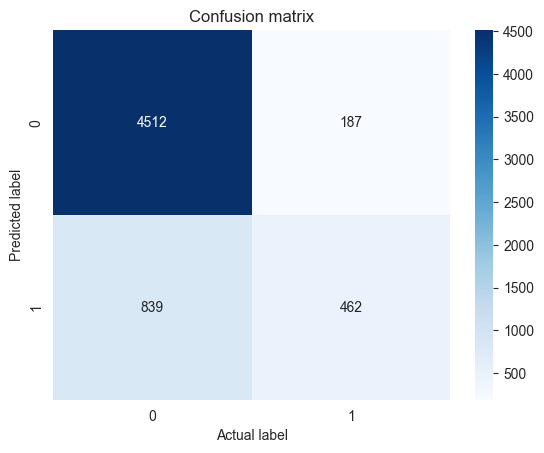

In [794]:
# Confusion matrix:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

<h3>Feature importance</h3>

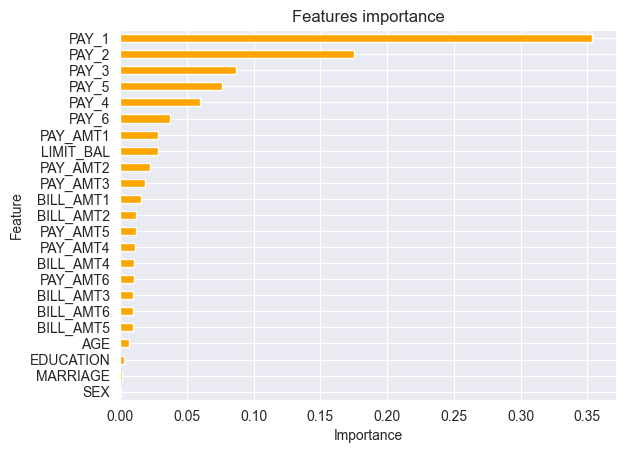

In [795]:
# Feature importance pour comprendre les valeurs les plus importantes pour la classification :

index = df.drop('DEFAULT', axis=1).columns
importances = pd.Series(rf.feature_importances_, index=index)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='orange')
plt.title('Features importance')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Essayons de sous-échantillonner le jeu de données pour voir si nous pouvons améliorer les résultats :

<h2>Random Forest + Sous-échantillonnage</h2>

In [810]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=75, sampling_strategy=0.4)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Avant sous-échantillonnage :")
print(f"DEFAULT 0 : {len(y_train[y_train == 0])}\nDEFAULT 1 : {len(y_train[y_train == 1])}")

print("\nAprès sous-échantillonnage :")
print(f"DEFAULT 0 : {len(y_train_rus[y_train_rus == 0])}\nDEFAULT 1 : {len(y_train_rus[y_train_rus == 1])}")

rf_rus = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=75)
rf_rus.fit(X_train_rus, y_train_rus)

y_pred_rf_rus = rf_rus.predict(X_test)

score = accuracy_score(y_test, y_pred_rf_rus)

print("\nModel evaluation:")
print('----------------------------')
print(f'Accuracy on test: %.2f%%' % (score * 100))

print(classification_report(y_test, y_pred_rf_rus))

Avant sous-échantillonnage :
DEFAULT 0 : 18665
DEFAULT 1 : 5335

Après sous-échantillonnage :
DEFAULT 0 : 13337
DEFAULT 1 : 5335

Model evaluation:
----------------------------
Accuracy on test: 83.10%
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4699
           1       0.67      0.44      0.53      1301

    accuracy                           0.83      6000
   macro avg       0.76      0.69      0.71      6000
weighted avg       0.82      0.83      0.82      6000



Et le sur-échantillonage :

<h2>Random Forest + Sur-échantillonnage</h2>

In [811]:
sm = SMOTE(random_state=75, sampling_strategy=0.4)
X_train_rfsm, y_train_rfsm = sm.fit_resample(X_train, y_train)

print("Avant suréchantillonnage :")
print(f"DEFAULT 0 : {len(y_train[y_train == 0])}\nDEFAULT 1 : {len(y_train[y_train == 1])}")

print("\nAprès suréchantillonnage :")
print(f"DEFAULT 0 : {len(y_train_rfsm[y_train_rfsm == 0])}\nDEFAULT 1 : {len(y_train_rfsm[y_train_rfsm == 1])}")

rf_sm = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=75)
rf_sm.fit(X_train_rfsm, y_train_rfsm)

y_pred_rf_sm = rf_sm.predict(X_test)

score = accuracy_score(y_test, y_pred_rf_sm)

print("\nModel evaluation:")
print('----------------------------')
print(f'Accuracy on test: %.2f%%' % (score * 100))

print(classification_report(y_test, y_pred_rf_sm))

Avant suréchantillonnage :
DEFAULT 0 : 18665
DEFAULT 1 : 5335

Après suréchantillonnage :
DEFAULT 0 : 18665
DEFAULT 1 : 7466

Model evaluation:
----------------------------
Accuracy on test: 82.93%
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4699
           1       0.68      0.41      0.51      1301

    accuracy                           0.83      6000
   macro avg       0.76      0.68      0.70      6000
weighted avg       0.81      0.83      0.81      6000



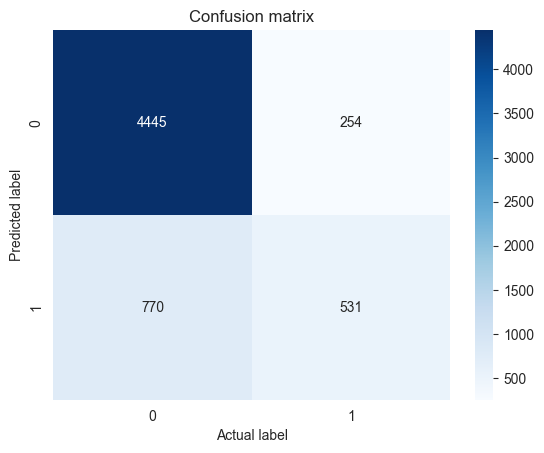

In [812]:
# Confusion matrix:
sns.heatmap(confusion_matrix(y_test, y_pred_rf_sm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

Traçons les courbes ROC (Receiver Operating Characteristic) pour mieux comprendre les performances de nos classificateurs et regardons l'AUC (Area Under the Curve) pour comparer nos algorithmes.

<h2>Courbes ROC et AUC</h2>

188/188 [==============================] - 0s 2ms/step


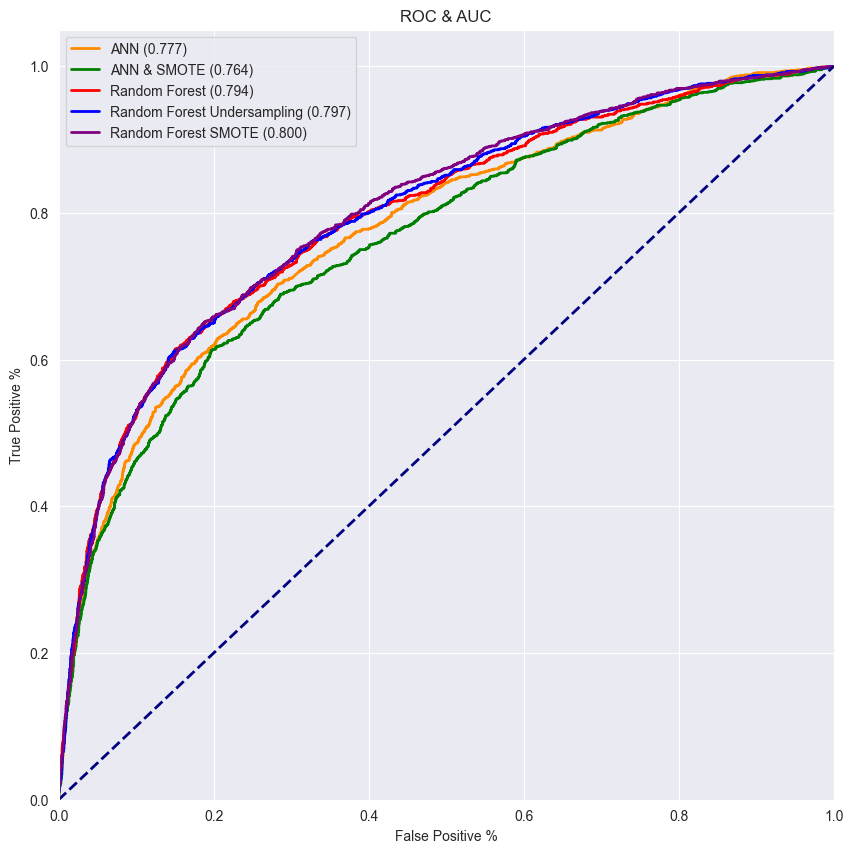

In [887]:
from sklearn.metrics import roc_curve, auc

# modèle ANN
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

# modèle ANN + SMOTE
fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_test, model_sm.predict(X_test))

# Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Random Forest + sous-échantillonnage
fpr_rf_rus, tpr_rf_rus, thresholds_rf_rus = roc_curve(y_test, rf_rus.predict_proba(X_test)[:, 1])

# Random Forest + SMOTE
fpr_rf_sm, tpr_rf_sm, thresholds_rf_sm = roc_curve(y_test, rf_sm.predict_proba(X_test)[:, 1])

roc_auc_sm = auc(fpr_sm, tpr_sm)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf_rus = auc(fpr_rf_rus, tpr_rf_rus)
roc_auc_rf_sm = auc(fpr_rf_sm, tpr_rf_sm)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ANN (%0.3f)' % roc_auc)
plt.plot(fpr_sm, tpr_sm, color='green', lw=2, label='ANN & SMOTE (%0.3f)' % roc_auc_sm)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (%0.3f)' % roc_auc_rf)
plt.plot(fpr_rf_rus, tpr_rf_rus, color='blue', lw=2, label='Random Forest Undersampling (%0.3f)' % roc_auc_rf_rus)
plt.plot(fpr_rf_sm, tpr_rf_sm, color='purple', lw=2, label='Random Forest SMOTE (%0.3f)' % roc_auc_rf_sm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive %')
plt.ylabel('True Positive %')
plt.title('ROC & AUC')
plt.legend(loc="upper left")
plt.show()